In [0]:
# Data analysis and wrangling
import pandas as pd
import numpy as np
import random as rnd

# Visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Manine Learning
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier

In [3]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"minoring","key":"877d61d0cbb1e712d00118114ddcd82f"}'}

In [0]:
!mkdir /root/.kaggle
!mv kaggle.json /root/.kaggle

In [5]:
!kaggle competitions download -c titanic

  0% 0.00/59.8k [00:00<?, ?B/s]
100% 59.8k/59.8k [00:00<00:00, 23.1MB/s]
  0% 0.00/28.0k [00:00<?, ?B/s]
100% 28.0k/28.0k [00:00<00:00, 28.7MB/s]
  0% 0.00/3.18k [00:00<?, ?B/s]
100% 3.18k/3.18k [00:00<00:00, 3.12MB/s]


In [0]:
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')
combine = [train_df, test_df]

In [7]:
print(train_df.columns.values)

['PassengerId' 'Survived' 'Pclass' 'Name' 'Sex' 'Age' 'SibSp' 'Parch'
 'Ticket' 'Fare' 'Cabin' 'Embarked']


In [8]:
train_df.head()
# Categorical Data: Survived, Sex, Embarked/PClass
# Numerical Data:   SibSp, Parch/Age, Fare
# Ticket, Cabin은 숫자 알파벳 합쳐져서 특성 찾기 어려움. 수정을 통해 원하는걸 얻어내자.
# Name은 오타가 있을 가능성이 있음. 특별한 정보 얻어올수도있는데(e.g. PhD), 어려울것 같다

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [9]:
train_df.tail()
# 데이터에서 빈값은 반드시해결해야함 (추후 정보를 점검하며 찾는다.)
# 수치 -> 최소값, 중앙값, 평균 범주 -> 최빈값 등으로 채움

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [10]:
# 데이터는 어떤 형태로 들어오나는 매우 중요함
# 범주형 데이터도 수치로 들어올 수 있고, 머신러닝 함수들에 입력하기 전에 좋은 형태로 바꾸어야힘
print(train_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB
None


In [11]:
# 수치형 데이터 분포
# 데이터에 대한 분포를 살피는 것은 데이터에 대한 이해를 높임.
# 891명의 샘플로 총 40%가 데이터로 주어짐
# Survived는 0과 1로 이루어진 범주형 데이터
# 대부분의 승객은 (>75%) 부모 또는 자식과 타지 않았음
# 30% 승객은 형제자매나 배우자와 함께 탔습니다.
# 요금의 경우, 매우적은 수의 승객이 512$보다 많이 지불했음
# 나이가 많은 승객(65-80)의 수는 1% 미만임

# .describe()를 통해 통계를 살필 수 있고,
# include=all 세팅을 통해 범주형 데이터도 분석 가능
train_df.describe(include="all")

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Maioni, Miss. Roberta",male,NaN,NaN,NaN,CA. 2343,NaN,B96 B98,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


In [12]:
# 위에서 알수 있는것
# Name은 모두 다르다
# 성별은 577/891로 남자가 65%를 차지한다
# 호실(Cabin) 은 양도 적고 중복도 많이보임. 일부 손님들이 호실을 공유한것으로 보임
# 승선(Embark)은 총 3개의 종류가 있고, S가 제일 많다
# Ticket은 중복이 매우 적다.

train_df.describe(include=['O'])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Maioni, Miss. Roberta",male,CA. 2343,B96 B98,S
freq,1,577,7,4,644


In [0]:
## 가정을 기반을한 데이터 분석

# 지금까지 한 기초적인 데이터 분석과 더불어 다음과 같은 가정을 더 할수있음.
# 가정은 후에 몇 작업을 통해 더 검증해야 할 수 도 있음

## Correlating.
# 우리는 각 특성이 생존 여부에 미치는 영항을 알고싶다.
# 프로젝트를 시작하며 초안을 만들고, 후에 모델링된 상관관계가 일치하는지 확인

## Completing
# Age는 분명 생존 여부와 관계가 있는 특성이기에 채워야 함
# Embarked도 생존 여부와 관계가 있다고 생각되고,다른 특성과 연관이 있으므로 채워넣어야

# Correcting
# Ticket의 경우에는 22%나 중복이되었고, 생존여부와 관계가 없다고 생각되니 특성에서 제거
# Cabin은 훈련 데이터와 테스트 데이터 모두 너무많은 NULL을 가지고 있으니 제외
# PassengerId는 훈련 데이터에서 생존여부와 관계없으니 제거
# Name은 형식이 다양하고, 생존여부와 직결된 관계가 없으니 제거해도 될 것 같다

## Creating
# Family라는 특성을 Parch와 SibSp를 합친 값으로 만듬
# Name 특성을 수정하여 Title이라는 특성을 만들것임
# Age특성을 수치-연속성 데이터에서 Age bands, 즉 나이대라는 범주형 데이터로 만듬
# Fare 범위로 새로운 특성을 만들어 분석을 도움

# Classifying
# 기존 디스크립션에 서술된 정보를 통해 가정을 할 수 있음
# Women(Sex = female)이 더 많이 생존
# Child(Age < ?) 이 많이 생존
# The upper-class passenger (Pclass=1)이 더 많이 생존

In [14]:
# Pivoting features로 분석하기
# 위의 관측과 예측들은 빠르고 간단하게 확인가능
# 지금은 NULL이나, NaN등 빈 값이 없는 특성값에 대해서만 할수있음
# 여기서는 Pclass, Sex, Sibsp and Parch 특성에 대해 살펴봄

# Pclass: Pclass=1인 승객에 대해서 생존 확률이 0.5보다 높은 것을 알 수 있음 -> 모델 특성
# Sex: 실제 여성 생존확률이 74%로 높은수치
# SibSp and Parch: 두 특성은 상관관계를 찾기 힘듬.
# 이런경우 특성을 합쳐 새로운 성질을 찾아내야 함

(train_df[['Pclass', 'Survived']]
        .groupby(['Pclass'], as_index=False)
        .mean()
        .sort_values(by='Survived', ascending=False))

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


In [15]:
(train_df[['Sex', 'Survived']]
        .groupby(['Sex'], as_index=False)
        .mean()
        .sort_values(by='Survived', ascending=False))

,Sex,Survived
0,female,0.742038
1,male,0.188908


In [16]:
(train_df[['SibSp', 'Survived']]
        .groupby(['SibSp'], as_index=False)
        .mean()
        .sort_values(by='Survived', ascending=False))

,SibSp,Survived
1,1,0.535885
2,2,0.464286
0,0,0.345395
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


In [17]:
(train_df[['Parch', 'Survived']]
        .groupby(['Parch'], as_index=False)
        .mean()
        .sort_values(by='Survived', ascending=False))

,Parch,Survived
3,3,0.600000
1,1,0.550847
2,2,0.500000
0,0,0.343658
5,5,0.200000
4,4,0.000000
6,6,0.000000


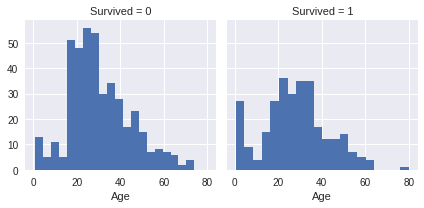

In [18]:
## 데이터 시각화를 통한 분석

# 수치형 특성의 상관관계
# 히스토그램 차트 -> 연속형 수치형 변수 분석에 유용
# 연속형 데이터를 사용자 지정 범위에 따라 나타냄

# 영아 (Age <=4 는 생존확률이 매우 높음)
# 최고력령 승객은 살았음  Age = 80
# 15 ~ 25세에 사람들은 생존하지 못한 사람이 많음
# 대부분의 승객은 15 - 35 dlek.

# Decision
# 이 간단한 분석으로 우리는 다음과 같은 가정을 할 수 있음
# Age 특성은 모델에 필요함
# Age에서 Null은 채워야함
# 나이를 그룹화 해야함 (연속형 -> 범주형)
g = sns.FacetGrid(train_df, col='Survived')
g.map(plt.hist, 'Age', bins=20)

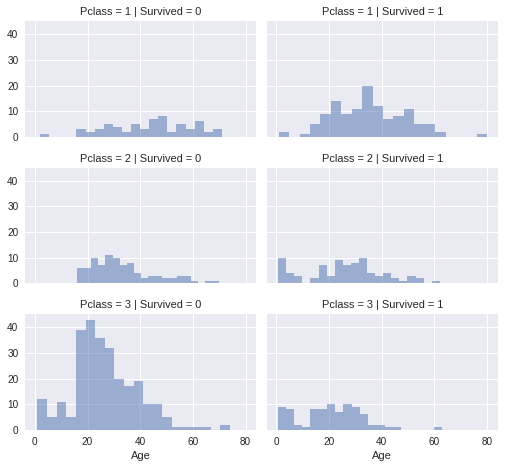

In [19]:
# 수치형과 서수형 특성의 상관관계
# 1개의 그래프로도 여러 특성을 조합하여 상관관계를 해볼 수 있음
# 이는 수치형, 범주형 특성에서 수치를 가지고 있는 데이터에서 가능

# Observation
# Pclass=3인 승객이 가장많음
# Pclass 2, PClass=3에서 영아 승객은 대부분 생존
# PClass 승객은 대부분 생존
# PClass 에 따라 승객의 나이 분포는 다름

# Devision
# Pclass는 모델에 필요한 특성

grid = sns.FacetGrid(train_df,
                     col='Survived',
                     row='Pclass',
                     size=2.2, 
                     aspect=1.6)
grid.map(plt.hist, 'Age', alpha=.5, bins=20)
grid.add_legend();


/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1468: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data[hue_mask])


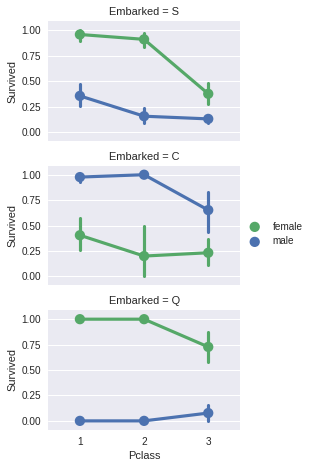

In [20]:
## 범주형 특성의 상관관계

# Observation
# 여성 승객이 높은율로 생존
# 예외적으로 Embarked=C인 남성의 생존비율이 높음
# 이는 Pclass와의 상관관계일수 있으며, 특성들은 꼭 Survived와 직접적으로 연관될 필요는 없음

# Devision
# Sex 특성은 모델에 필요함
# Embarked 특성은 빈 부분을 채워야 하고, 모델에 있어 필요한 특성임
grid = sns.FacetGrid(train_df,
                     row='Embarked',
                     size=2.2,
                     aspect=1.6)
grid.map(sns.pointplot, 'Pclass', 'Survived', 'Sex', palette='deep')
grid.add_legend()

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


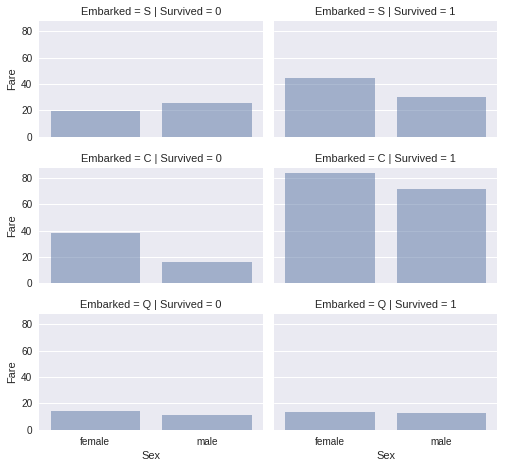

In [21]:
# 범주형 특성과 수치형 특성의 상관관계

# 요금을 높게 낸 승객은 생존율이 높았다
# 생존율과 Embarked의 상관관계

# Decision
# Fare 특성의 분류를 고려
grid = sns.FacetGrid(train_df,
                     row='Embarked',
                     col='Survived',
                     size=2.2,
                     aspect=1.6)
grid.map(sns.barplot, 'Sex', 'Fare', alpha=.5, ci=None)
grid.add_legend()

In [22]:
## 데이터 처리하기
# 지금까지 주어진 데이터에 대해 가정을 하며, 일부 특성 선택
# 전처리나 수정을 함

## 특성 제거
# Cabin, Ticket 제거. 훈련 데이터, 테스트 데이터에서 모두 제거

print("Before", train_df.shape,
                test_df.shape,
                combine[0].shape,
                combine[1].shape)

train_df = train_df.drop(['Ticket', 'Cabin'], axis=1)
test_df = test_df.drop(['Ticket', 'Cabin'], axis=1)
combine = [train_df, test_df]

print("After", train_df.shape,
               test_df.shape,
               combine[0].shape,
               combine[1].shape)

Before (891, 12) (418, 11) (891, 12) (418, 11)
After (891, 10) (418, 9) (891, 10) (418, 9)


In [23]:
## 기존 특성에서 새로운 특성 만들기
# Name 은 까다로운 특성. 일부 Advanced 커널에서는 다루기도 함
# Title이라는 특성을 만듬.
# 정규표현식 이용, Name에서 . 앞까지 자름
# expand=False를 이용하여 DataFrame 반환

# Observations
# 대부분의 Title은 Age범위로 그룹을 정확하게 묶음
# Title에 따른 Age범위의 생존율은 약간 다름
# 일부 Title 은 생존했거나, 대부분 생존하지 않음

# Decision
# Title 특성이용

for dataset in combine:
    dataset['Title'] = dataset.Name.str.extract(' ([A-Za-z]+)\.', expand=False)

pd.crosstab(train_df['Title'], train_df['Sex'])

Sex,female,male
Title,,
Capt,0,1
Col,0,2
Countess,1,0
Don,0,1
Dr,1,6
Jonkheer,0,1
Lady,1,0
Major,0,2
Master,0,40


In [24]:
# Title중 적은 수는 Rare로 치환
# 변수의 수를 줄여줌

for dataset in combine:
    dataset['Title'] = dataset['Title'].replace([
            'Lady', 'Countess','Capt', 'Col', 'Don', 'Dr',
            'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'],
            'Rare')

    dataset['Title'] = dataset['Title'].replace('Mlle', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Ms', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Mme', 'Mrs')
    
train_df[['Title', 'Survived']].groupby(['Title'], as_index=False).mean()

,Title,Survived
0,Master,0.575000
1,Miss,0.702703
2,Mr,0.156673
3,Mrs,0.793651
4,Rare,0.347826


In [25]:
# Nominal data to number

title_mapping = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Rare": 5}
for dataset in combine:
    dataset['Title'] = dataset['Title'].map(title_mapping)
    dataset['Title'] = dataset['Title'].fillna(0)
    
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,3
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S,3
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S,1


In [26]:
# Name을 Title로 변환했으니, 이름은 제거
# 더불에 PassengerId 특성도 지움

train_df = train_df.drop(['Name', 'PassengerId'], axis=1)
test_df = test_df.drop(['Name'], axis=1)
combine = [train_df, test_df]
train_df.shape, test_df.shape

((891, 9), (418, 9))

In [27]:
# Categorical 특성 전환
# 문자열로 이루어진 특성을 수치형으로 변환
# 대부분의 알고리즘은 수치형을 입력으로 받음

# femail = 1, male = 0

for dataset in combine:
    dataset['Sex'] = dataset['Sex'].map( {'female': 1, 'male': 0} ).astype(int)
    
train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,0,22.0,1,0,7.2500,S,1
1,1,1,1,38.0,1,0,71.2833,C,3
2,1,3,1,26.0,0,0,7.9250,S,2
3,1,1,1,35.0,1,0,53.1000,S,3
4,0,3,0,35.0,0,0,8.0500,S,1


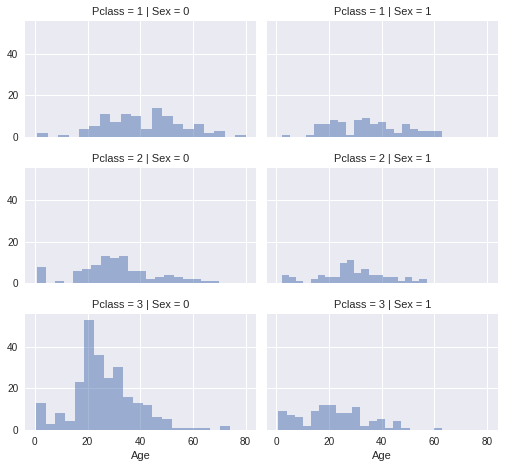

In [28]:
## 수치 연속형 특성 채우기

# 빈부분의 데이터를 채워야함 일단 Age

# Numerical, Continuous 채우는 방법
# 1. 평균과 분산을 이용한 랜덤
# 2. 각 특성의 중앙값으로 사용
# 3. 중앙값을 기준으로 평균과 분산 이용

# 여기선 2번 사용

grid = sns.FacetGrid(train_df, row='Pclass', col='Sex', size=2.2, aspect=1.6)
grid.map(plt.hist, 'Age', alpha=.5, bins=20)
grid.add_legend()

In [29]:
# Pclass 와 Sex 특성을 이용하여 Age를 예상하는 코드
guess_ages = np.zeros((2, 3))
guess_ages

array([[0., 0., 0.],
       [0., 0., 0.]])

In [30]:
for dataset in combine:
    for i in range(0, 2):
        for j in range(0, 3):
            guess_df = dataset[(dataset['Sex'] == i) & \
                                  (dataset['Pclass'] == j+1)]['Age'].dropna()

            age_guess = guess_df.median() # 중앙값 사용

            # Convert random age float to nearest .5 age
            guess_ages[i,j] = int( age_guess/0.5 + 0.5 ) * 0.5
            
    for i in range(0, 2):
        for j in range(0, 3):
            dataset.loc[ (dataset.Age.isnull()) & (dataset.Sex == i) & (dataset.Pclass == j+1),\
                    'Age'] = guess_ages[i,j]

    dataset['Age'] = dataset['Age'].astype(int)

train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,0,22,1,0,7.2500,S,1
1,1,1,1,38,1,0,71.2833,C,3
2,1,3,1,26,0,0,7.9250,S,2
3,1,1,1,35,1,0,53.1000,S,3
4,0,3,0,35,0,0,8.0500,S,1


In [31]:
# 연령대로 묶어서 생존율과 연결

train_df['AgeBand'] = pd.cut(train_df['Age'], 5)
(train_df[['AgeBand', 'Survived']]
        .groupby(['AgeBand'], as_index=False)
        .mean()
        .sort_values(by='AgeBand', ascending=True))

,AgeBand,Survived
0,"(-0.08, 16.0]",0.550000
1,"(16.0, 32.0]",0.337374
2,"(32.0, 48.0]",0.412037
3,"(48.0, 64.0]",0.434783
4,"(64.0, 80.0]",0.090909


In [32]:
for dataset in combine:    
    dataset.loc[ dataset['Age'] <= 16, 'Age'] = 0
    dataset.loc[(dataset['Age'] > 16) & (dataset['Age'] <= 32), 'Age'] = 1
    dataset.loc[(dataset['Age'] > 32) & (dataset['Age'] <= 48), 'Age'] = 2
    dataset.loc[(dataset['Age'] > 48) & (dataset['Age'] <= 64), 'Age'] = 3
    dataset.loc[ dataset['Age'] > 64, 'Age'] = 4
train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,AgeBand
0,0,3,0,1,1,0,7.2500,S,1,"(16.0, 32.0]"
1,1,1,1,2,1,0,71.2833,C,3,"(32.0, 48.0]"
2,1,3,1,1,0,0,7.9250,S,2,"(16.0, 32.0]"
3,1,1,1,2,1,0,53.1000,S,3,"(32.0, 48.0]"
4,0,3,0,2,0,0,8.0500,S,1,"(32.0, 48.0]"


In [33]:
train_df = train_df.drop(['AgeBand'], axis=1)
combine = [train_df, test_df]
train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,0,1,1,0,7.2500,S,1
1,1,1,1,2,1,0,71.2833,C,3
2,1,3,1,1,0,0,7.9250,S,2
3,1,1,1,2,1,0,53.1000,S,3
4,0,3,0,2,0,0,8.0500,S,1


In [35]:
## 기존 특성을 합쳐 새로운 특성 만들기
# FamilySize 특성을 Parch와SibSp를 이용하여 만듬

for dataset in combine:
    dataset['FamilySize'] = dataset['SibSp'] + dataset['Parch'] + 1

train_df[['FamilySize', 'Survived']].groupby(['FamilySize'], as_index=False).mean().sort_values(by='Survived', ascending=False)
    

,FamilySize,Survived
3,4,0.724138
2,3,0.578431
1,2,0.552795
6,7,0.333333
0,1,0.303538
4,5,0.200000
5,6,0.136364
7,8,0.000000
8,11,0.000000


In [36]:
# IsAlone 특성을 만듬
for dataset in combine:
    dataset['IsAlone'] = 0
    dataset.loc[dataset['FamilySize'] == 1, 'IsAlone'] = 1
    
train_df[['IsAlone', 'Survived']].groupby(['IsAlone'], as_index=False).mean()

,IsAlone,Survived
0,0,0.505650
1,1,0.303538


In [37]:
# Family size 4명, 혼자랑 7:3 은 꽤 재밌는 숫자
train_df = train_df.drop(['Parch', 'SibSp', 'FamilySize'], axis=1)
test_df = test_df.drop(['Parch', 'SibSp', 'FamilySize'], axis=1)

combine = [train_df, test_df]

train_df.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone
0,0,3,0,1,7.2500,S,1,0
1,1,1,1,2,71.2833,C,3,0
2,1,3,1,1,7.9250,S,2,1
3,1,1,1,2,53.1000,S,3,0
4,0,3,0,2,8.0500,S,1,1


In [38]:
# Pclass 와 Age의 특성을 합친 가상특성
for dataset in combine:
    dataset['Age*Class'] = dataset.Age * dataset.Pclass
    
train_df.loc[:, ['Age*Class', 'Age', 'Pclass']].head(10)

,Age*Class,Age,Pclass
0,3,1,3
1,2,2,1
2,3,1,3
3,2,2,1
4,6,2,3
5,3,1,3
6,3,3,1
7,0,0,3
8,3,1,3
9,0,0,2


In [0]:
# 범주형 특성 채우기

# Embarked 특성은 S, Q, C 값을 가짐
# 훈련데이터중 2개값만 NULL 이니까 최빈값으로 채우자

freq_port = train_df.Embarked.dropna().mode()[0]

In [42]:
for dataset in combine:
    dataset['Embarked'] = dataset['Embarked'].fillna(freq_port)

(train_df[['Embarked', 'Survived']]
        .groupby(['Embarked'], as_index=False)
        .mean()
        .sort_values(by='Survived', ascending=False))


,Embarked,Survived
0,C,0.553571
1,Q,0.389610
2,S,0.339009


In [43]:
## 범주형 특성을 수치형으로 변환
# Embarked 특성을 수치형으로 바꿈

for dataset in combine:
    dataset['Embarked'] = dataset['Embarked'].map(
            {
                'S': 0, 'C': 1, 'Q': 2
            }).astype(int)
    
train_df.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone,Age*Class
0,0,3,0,1,7.2500,0,1,0,3
1,1,1,1,2,71.2833,1,3,0,2
2,1,3,1,1,7.9250,0,2,1,3
3,1,1,1,2,53.1000,0,3,0,2
4,0,3,0,2,8.0500,0,1,1,6


In [44]:
# Fare 특성은 한명만 비었음
# 굳이 상관분석은 하지 않음

test_df['Fare'].fillna(test_df['Fare'].dropna().median(), inplace=True)
test_df.head()

,PassengerId,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone,Age*Class
0,892,3,0,2,7.8292,2,1,1,6
1,893,3,1,2,7.0000,0,3,0,6
2,894,2,0,3,9.6875,2,1,1,6
3,895,3,0,1,8.6625,0,1,1,3
4,896,3,1,1,12.2875,0,3,0,3


In [45]:
## 지금껏과 같이 Fare 특성 확인
train_df['FareBand'] = pd.qcut(train_df['Fare'], 4)
(train_df[['FareBand', 'Survived']]
        .groupby(['FareBand'], as_index=False)
        .mean()
        .sort_values(by='FareBand', ascending=True))

,FareBand,Survived
0,"(-0.001, 7.91]",0.197309
1,"(7.91, 14.454]",0.303571
2,"(14.454, 31.0]",0.454955
3,"(31.0, 512.329]",0.581081


In [46]:
for dataset in combine:
    dataset.loc[dataset['Fare'] <= 7.91, 'Fare'] = 0
    dataset.loc[(dataset['Fare'] > 7.91) & (dataset['Fare'] <= 14.454), 'Fare'] = 1
    dataset.loc[(dataset['Fare'] > 14.454) & (dataset['Fare'] <= 31), 'Fare'] = 2
    dataset.loc[dataset['Fare'] > 31, 'Fare'] = 3
    dataset['Fare'] = dataset['Fare'].astype(int)

train_df = train_df.drop(['FareBand'], axis=1)
combine = [train_df, test_df]

train_df.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone,Age*Class
0,0,3,0,1,0,0,1,0,3
1,1,1,1,2,3,1,3,0,2
2,1,3,1,1,1,0,2,1,3
3,1,1,1,2,3,0,3,0,2
4,0,3,0,2,1,0,1,1,6


In [47]:
test_df.head()

,PassengerId,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone,Age*Class
0,892,3,0,2,0,2,1,1,6
1,893,3,1,2,0,0,3,0,6
2,894,2,0,3,1,2,1,1,6
3,895,3,0,1,1,0,1,1,3
4,896,3,1,1,1,0,3,0,3


In [50]:
## 모델, 예측과 해결

# 분류문제, 지도학습
# Logistic Regression
# KNN or k-Nearest Neighbors
# Support Vector Machines
# Naive Bayes classifier
# Decision Tree
# Random Forest
# Perceptron
# Artificial neural network
# RVM or Relevance Vector Machine

# train 을 validation dataset으로 만들자
# test data는 결과값을 모르기에 score를 낼 수가 없음
# 그렇기에 훈련 데이터셋이 과적합 되었는지 체크하기 위해 훈련 데이터셋에서 랜덤으로 추출한 데이터셋 이용
# scikit-learn 에서 train_test_split으로 나눔

X_train = train_df.drop('Survived', axis=1)
Y_train = train_df['Survived']
X_test = test_df.drop('PassengerId', axis=1).copy() # 레퍼런스가 아니군.
X_train.shape, Y_train.shape, X_test.shape
X_test.head()

,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone,Age*Class
0,3,0,2,0,2,1,1,6
1,3,1,2,0,0,3,0,6
2,2,0,3,1,2,1,1,6
3,3,0,1,1,0,1,1,3
4,3,1,1,1,0,3,0,3


In [52]:
# 1. Logistic Regression
# 이 모델은 종속변수, 독립변수의 관계를 구체적인 함수 관계로 나타내어 예측에 이용

logreg = LogisticRegression()
logreg.fit(X_train, Y_train)
Y_pred = logreg.predict(X_test)
acc_log = round(logreg.score(X_train, Y_train) * 100, 2)
acc_log

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


81.26

In [57]:
# 양의 계수는 확률을 증가, 음의 계수는 확률을 감소

coeff_df = pd.DataFrame(train_df.columns.delete(0))
coeff_df.columns = ['Feature']
coeff_df['Correlation'] = pd.Series(logreg.coef_[0])

coeff_df.sort_values(by='Correlation', ascending=False)

,Feature,Correlation
1,Sex,2.200978
5,Title,0.414362
4,Embarked,0.281026
6,IsAlone,0.262084
3,Fare,-0.022062
7,Age*Class,-0.085959
2,Age,-0.371647
0,Pclass,-1.083515


In [59]:
# Support Vector Machines

svc = SVC()
svc.fit(X_train, Y_train)
Y_pred = svc.predict(X_test)
acc_svc = round(svc.score(X_train, Y_train) * 100, 2)
acc_svc

/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


83.5

In [60]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, Y_train)
Y_pred = knn.predict(X_test)
acc_knn = round(knn.score(X_train, Y_train) * 100, 2)
acc_knn

84.06

In [61]:
# Gaussian Naive Bayes

gaussian = GaussianNB()
gaussian.fit(X_train, Y_train)
Y_pred = gaussian.predict(X_test)
acc_gaussian = round(gaussian.score(X_train, Y_train) * 100, 2)
acc_gaussian

76.88

In [63]:
# Perceptron

perceptron = Perceptron()
perceptron.fit(X_train, Y_train)
Y_pred = perceptron.predict(X_test)
acc_perceptron = round(perceptron.score(X_train, Y_train) * 100, 2)
acc_perceptron

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in Perceptron in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)


78.79

In [67]:
# Stochastic Gradient Descent

sgd = SGDClassifier()
sgd.fit(X_train, Y_train)
Y_pred = sgd.predict(X_test)
acc_sgd = round(sgd.score(X_train, Y_train) * 100, 2)
acc_sgd

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)


78.11

In [68]:
# Decision Tree

decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, Y_train)
Y_pred = decision_tree.predict(X_test)
acc_decision_tree = round(decision_tree.score(X_train,Y_train) * 100, 2)
acc_decision_tree

86.64

In [69]:
# Random Forest

random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, Y_train)
Y_pred = random_forest.predict(X_test)
acc_random_forest = round(random_forest.score(X_train, Y_train) * 100,2 )
acc_random_forest

86.64

In [71]:
# 모델 비교
# Random Forest 와 Decision Tree가 점수가 같지만,
# Random Forest가 과적합이 더 적게 일어날수도.

models = pd.DataFrame({
    'Model': ['Support Vector Machines', 'KNN', 'Logistic Regression',
             'Random Forest', 'Naive Bayes', 'Perceptron',
             'Stochastic Gradient Descent', 'Decision Tree'],
    'Score' : [acc_svc, acc_knn, acc_log, acc_random_forest, acc_gaussian,
              acc_perceptron, acc_sgd, acc_decision_tree]})

models.sort_values(by='Score', ascending=False)

,Model,Score
3,Random Forest,86.64
7,Decision Tree,86.64
1,KNN,84.06
0,Support Vector Machines,83.50
2,Logistic Regression,81.26
5,Perceptron,78.79
6,Stochastic Gradient Descent,78.11
4,Naive Bayes,76.88


In [0]:
# to_csv로 제출

submission = pd.DataFrame({
    'PassengerId': test_df['PassengerId'],
    'Survived': Y_pred
})
submission.to_csv('titanic.csv', index=False)